# 项目-通过将为算法做商品的品类分析

> 五大环节  
- 问题定义  
- 数据准备
- 选择模型
- 训练调参
- 评估优化

##  问题定义  
> 背景:

- 某商家记录下30种商品的市场分析数据  
- 信息包括: 销售增长率,市场占有率,渠道成熟度,用户好评度  

> 问题:  
- 如何根据市场分析,观察哪些商品具有共性(或许可以归为同一类品)

### 导入数据

In [1]:
# 导入Pandas数据处理库
import pandas as pd

# 导入品类降维数据集
data = pd.read_csv('品类降维.csv')
data.head()

序号       商品  销售增长率  市场占有率  渠道成熟度  用户好评度  品类
0   1     黑枸杞粉    7.0    3.2    4.7    1.4   2
1   2     舒缓眼膜    6.3    3.3    4.7    1.6   2
2   3     玫瑰香皂    6.5    2.8    4.6    1.5   2
3   4  原汁葡萄汁1升    5.0    3.4    1.5    0.2   1
4   5    薰衣草香皂    5.2    2.7    3.9    1.4   2

### 指定降维特征并可视化

In [2]:
# 导入SKLearn中的PCA工具
from sklearn.decomposition import PCA

# 指定需要进行降维的特征
features = data[['销售增长率', '市场占有率', 
                 '渠道成熟度', '用户好评度']]

# 用PCA算法进行降维，并指定最终维度为2，便于可视化
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

In [5]:
#打印降维后的数据
print(reduced_data)

[[ 1.22463279 -0.73501648]
 [ 1.01223248 -0.21594691]
 [ 0.99636989 -0.13133274]
 [-2.70930076 -0.3318117 ]
 [-0.14179501  0.72979138]
 [ 2.85547056 -0.32986113]
 [-2.33668102 -0.830441  ]
 [ 0.52592032  0.41512778]
 [-2.98791375 -0.03793733]
 [ 3.32782654 -0.48238012]
 [ 2.53562275 -0.26839665]
 [-3.00679671  0.38427215]
 [ 2.21331016  0.23389132]
 [-2.76868024 -0.10671916]
 [-2.80408874 -0.46850044]
 [ 2.24812013  0.18629372]
 [ 0.04681702  0.72966042]
 [-2.91773822 -0.02990435]
 [ 0.36294911  1.27664898]
 [ 2.42802523  0.27904353]
 [-0.89372792  0.9026763 ]
 [ 1.28774975  0.66108599]
 [-2.81406061 -0.05403161]
 [ 1.86560388  0.26607987]
 [ 0.85219575 -0.30432241]
 [ 1.39452308 -0.53394854]
 [-2.75962938 -0.48854573]
 [ 0.96172115 -0.30474571]
 [ 2.85397249 -0.5535224 ]
 [-2.85265071  0.14279299]]


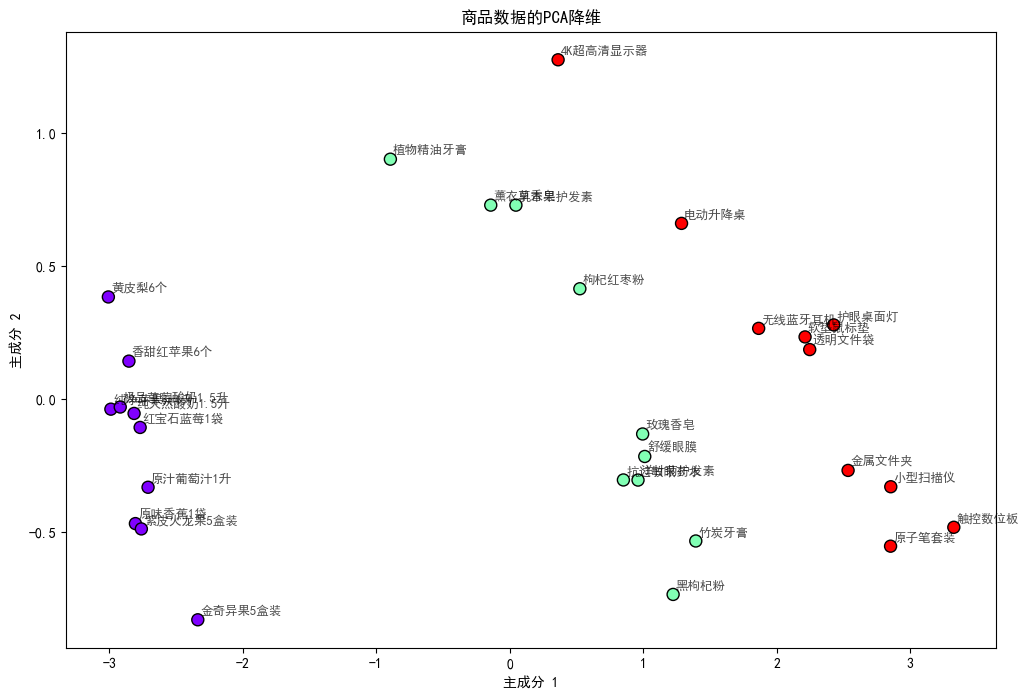

In [3]:
# 导入Matplotlib中的绘图工具pyplot
import matplotlib.pyplot as plt
# 设置字体为SimHei，以正常显示中文标签
plt.rcParams["font.family"]=['SimHei'] 
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

# 创建一个新的图形，设置大小为12x8
plt.figure(figsize=(12, 8))

# 在图上绘制降维后的数据点
plt.scatter(reduced_data[:, 0], 
            reduced_data[:, 1], 
            c=data['品类'], # 设置颜色
            cmap='rainbow', # 设置颜色映射
            edgecolor='k',  # 设置数据点边界颜色
            s=75 # 设置点的大小
            )

# 为每个数据点添加注释，用商品名标记每个点
offset = 0.02 # 我增加了一个偏移量，使得标签离数据点有一些距离
for i, name in enumerate(data['商品']):
    plt.annotate(name, (reduced_data[i, 0] + offset, 
                        reduced_data[i, 1] + offset), 
                        fontsize=9, alpha=0.7)

# 设置图的标题和x、y轴的标签
plt.title('商品数据的PCA降维')
plt.xlabel('主成分 1')
plt.ylabel('主成分 2')

# 去掉网格
plt.grid(False)

# 显示图形
plt.show()